In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Our Data

In [ ]:
data = {
    "X": [10, 9, 2, 15, 10, 16, 11, 16],
    "Y": [95, 80, 10, 50, 45, 98, 38, 93]
}
X = np.array(data["X"]).reshape(-1, 1)
Y = np.array(data["Y"])

Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X, Y)
linear_Y_pred = linear_model.predict(X)


Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)
poly_Y_pred = poly_model.predict(X_poly)

Evaluation of Model

In [ ]:
linear_mse = mean_squared_error(Y, linear_Y_pred)
linear_r2 = r2_score(Y, linear_Y_pred)

poly_mse = mean_squared_error(Y, poly_Y_pred)
poly_r2 = r2_score(Y, poly_Y_pred)

Printing Regression Equation and MSE for Linear and Polynomial

In [ ]:
print("Linear Regression Equation: Y = {:.2f}X + {:.2f}".format(linear_model.coef_[0], linear_model.intercept_))
print("Linear Regression MSE: {:.2f}, R²: {:.2f}".format(linear_mse, linear_r2))

print("\nPolynomial Regression Equation: Y = {:.2f} + {:.2f}X + {:.2f}X^2".format(
    poly_model.intercept_, poly_model.coef_[1], poly_model.coef_[2]))
print("Polynomial Regression MSE: {:.2f}, R²: {:.2f}".format(poly_mse, poly_r2))

Linear Regression Equation: Y = 4.59X + 12.58
Linear Regression MSE: 518.00, R²: 0.44

Polynomial Regression Equation: Y = -2.73 + 8.79X + -0.22X^2
Polynomial Regression MSE: 494.55, R²: 0.46


Plotting Graph

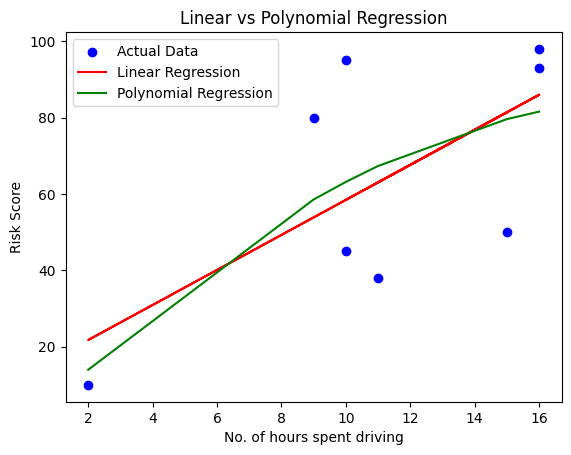

In [ ]:
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, linear_Y_pred, color="red", label="Linear Regression")
plt.plot(np.sort(X, axis=0), poly_model.predict(poly.fit_transform(np.sort(X, axis=0))), color="green", label="Polynomial Regression")
plt.title("Linear vs Polynomial Regression")
plt.xlabel("No. of hours spent driving")
plt.ylabel("Risk Score")
plt.legend()
plt.show()